In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import feature_extraction, linear_model, model_selection, preprocessing

#### Index

1. [Introduction](#intro)<br>
2. [Exploratory Data Analysis](#eda)
3. [Modelling](#modelling)

<a id='intro'></a>
# Introduction
Twitter has become an important communication channel in times of emergency.
The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time. Because of this, more agencies are interested in programatically monitoring Twitter (i.e. disaster relief organizations and news agencies).

But, it’s not always clear whether a person’s words are actually announcing a disaster. This project hopes to create a model that is able to accurately predict whether a tweet is about a real disaster or not. To begin the process, then, we will carry out some exploratory data analysis to fully understand the dataset that we are working with.

<a id="eda"></a>
# Exploratory Data Analysis

In [2]:
train_df = pd.read_csv("train.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


## Keywords

One of the columns within the dataset is `keyword`. Let us see what kind of keywords are chosen.

In [4]:
train_df[~train_df['keyword'].isna()]

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
...,...,...,...,...,...
7578,10830,wrecked,NaN,@jt_ruff23 @cameronhacker and I wrecked you both,0
7579,10831,wrecked,"Vancouver, Canada",Three days off from work and they've pretty mu...,0
7580,10832,wrecked,London,#FX #forex #trading Cramer: Iger's 3 words tha...,0
7581,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Li...,0


In [5]:
train_df['keyword'].unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [6]:
len(train_df['keyword'].unique())

222

We see that there are 222 unique keywords within the dataset that are repeated within several tweets. They comprise a number of verbs and nouns that generally could be associated with disaster. From the above we are also able to gain an insight into the way in which the `location column` is formatted.

## Location

From the dataframe above, we were able to see that the formatting of location is not always consistent. For example, while some locations are described as City, Country other locations give more or less detail.

In [7]:
len(train_df['location'].unique())

3342

Although we are given 3342 unique locations, this is probably an inflated number considering the non-standardised formatting of the location.

## Text

Given that the text is taken from tweets, we know that text is limited to 140 characters. Text is therefore never going to be able to exceed this upper limit. 

As we are going to be primarily using this data for our model, we need to be able to analyse it and pass it into a model. To do this, we need to numerically encode the text. One way in which we can do this is by vectorising the words.

## Target

Another aspect that we need to be aware of is the distribution of target variables.

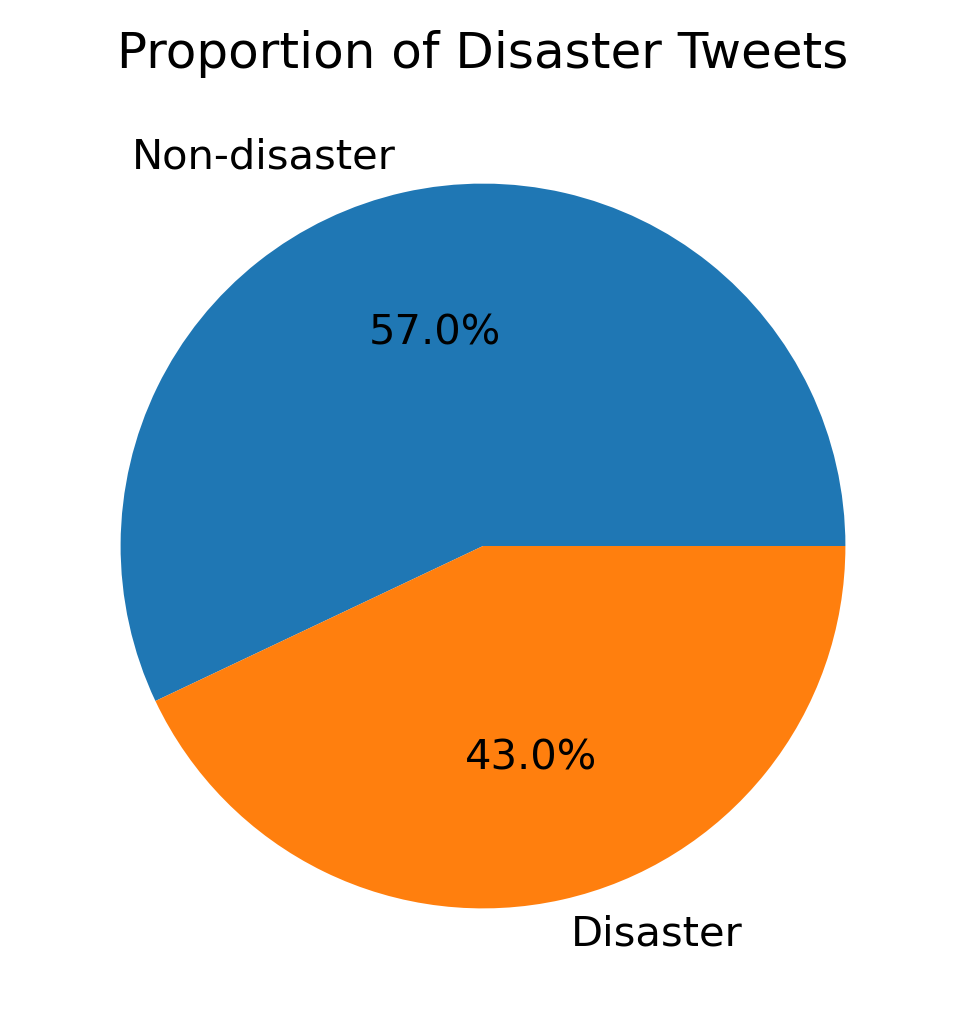

In [13]:
data = train_df['target'].value_counts(normalize=True)

plt.figure(dpi=300)
plt.pie(x=data, labels=['Non-disaster', 'Disaster'], autopct='%1.1f%%')
plt.title("Proportion of Disaster Tweets")
plt.show()

Although not perfectly balanced, we should not worry about imbalance.

# Text preprocessing

As we saw from the previous dataframes, the text within the tweets is comprised of mentions, hashtags, links, and other forms of text, which all provide information of some form or another. However, when building our model, we need to be aware of the ways in which this is affecting our prediction, meaning that it would be beneficial to standardise the content of the tweets. This would therefore also include removing information that is not useful in the tweets such as url links.

In [14]:
import re

def remove_link():
    raise NotImplementedError

train_df.head()


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
